# MNIST Hand Written Digit Classification 



---

- Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model. 

>I used SVC and Logistic regression. The gamma for SVC was set to auto. Solver for logistic regression is set to 'lbfgs' cause its a binary classification problem. We get an accuracy around 99% for both the models. 


- Use any one method to classify any three digits (e.g. 0 vs 1 vs 2)

>*I used RandomForest and LogisticRegressionCV to classify the three digits `i.e. 5, 7 & 0`.*
>With RandomForest, I got an accuracy of `66.73%`. 

**logistic regression CV over "l1" penelty :**

>Max accuracy regularization Cs  = `10 ^ 9` 
>Max accuracy train =  `98.43%`
>Test Accuracy : `98.60%`


**Logistic Regression CV over "l2" panelty :**

>Max accuracy regularization Cs  = `10 ^ 2`  
>Max accuracy train =  `98.42%`
>Test Accuracy : `98.60%`


- Can you write down a digit on a paper, take a picture, and let your model tell which digit is it?


>The logistic regression model and SVC predicts that the image that I uploaded is a digit 5. That is true.



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_mldata

from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

import collections
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape) 
print(y.shape)

/Users/shradhitsubudhi/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/shradhitsubudhi/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)
(70000,)


In [3]:
#X[1].shape

In [4]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [5]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

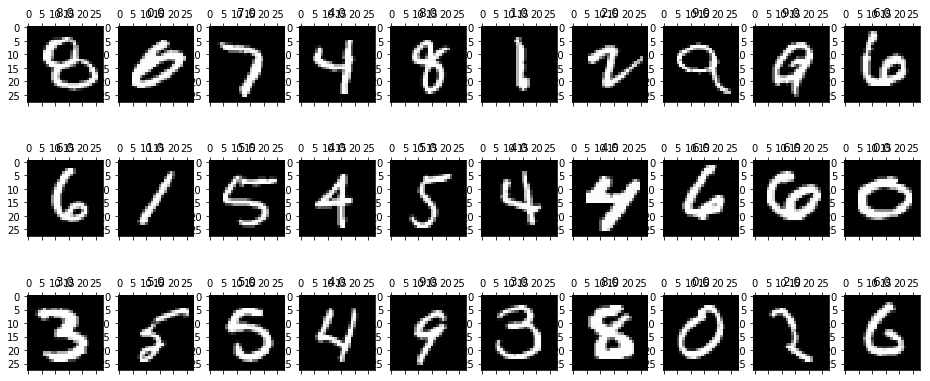

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [7]:
df.label.unique()

array(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0'], dtype=object)

In [8]:
freq_num = list(df.label)
counter=collections.Counter(freq_num)
print(counter)

Counter({'1.0': 7877, '7.0': 7293, '3.0': 7141, '2.0': 6990, '9.0': 6958, '0.0': 6903, '6.0': 6876, '8.0': 6825, '4.0': 6824, '5.0': 6313})


In [9]:
df_five_seven = df[(df.label == '5.0') | (df.label == '7.0')]
pd.set_option('display.max_columns', 784)
df_five_seven.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,...,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,p

# SVC 

In [10]:
x =  df_five_seven[df_five_seven.columns.difference(['label'])]
y =  df_five_seven['label']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [11]:
model = SVC(gamma='auto')
model.fit(xTrain, yTrain)
model.score(xTrain, yTrain)

0.994330113397732

In [12]:
predicted = model.predict(xTest)
accuracy_score(yTest, predicted)

0.993875551200392

# Logistic Regression


In [13]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(xTrain, yTrain)
clf.score(xTrain, yTrain)

0.99895002099958

In [14]:
predicted = clf.predict(xTest)

In [15]:
accuracy_score(yTest, predicted)

0.9911807937285644

## Random Forest (3 digit)

In [16]:
df_five_seven_zero = df[(df.label == '5.0') | (df.label == '7.0') | (df.label == '0.0')]
df_five_seven_zero.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,...,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,p

In [17]:
x =  df_five_seven_zero[df_five_seven.columns.difference(['label'])]
y =  df_five_seven_zero['label']
xTrain_, xTest_, yTrain_, yTest_ = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [18]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rf.fit(xTrain_, yTrain_)
clf_rf.score(xTrain_, yTrain_)

0.9333379771524102

In [19]:
predicted= clf.predict(xTest_)
accuracy_score(yTest_, predicted)

0.6673167560539575

## Logistic Regression 

In [20]:
logistic_searchCV = LogisticRegressionCV( 
        Cs = list(np.power(10.0, np.arange(0, 11)))
        ,penalty = 'l1'
        ,cv = 10
        ,scoring ='accuracy'
        ,max_iter = 10000
        ,solver = 'saga'
        ,tol = 10
        ,multi_class = "multinomial"
        ,random_state = 42
        )
    
logistic_searchCV.get_params()
logistic_searchCV.fit(xTrain_, yTrain_)
logistic_searchCV.scores_['0.0']

array([[0.98051496, 0.98399443, 0.98121086, 0.98121086, 0.98329854,
        0.98329854, 0.98260264, 0.98260264, 0.98190675, 0.98329854,
        0.98469033],
       [0.98329854, 0.98677801, 0.98886569, 0.98608212, 0.98608212,
        0.9874739 , 0.9874739 , 0.9874739 , 0.9881698 , 0.9881698 ,
        0.9881698 ],
       [0.98050139, 0.98537604, 0.98537604, 0.98328691, 0.98537604,
        0.98467967, 0.98537604, 0.98467967, 0.98537604, 0.98467967,
        0.98328691],
       [0.98259053, 0.98537604, 0.98467967, 0.98328691, 0.98328691,
        0.98467967, 0.98467967, 0.98467967, 0.98537604, 0.98537604,
        0.98467967],
       [0.98537604, 0.98607242, 0.98398329, 0.98328691, 0.98328691,
        0.98259053, 0.98259053, 0.98189415, 0.98189415, 0.98189415,
        0.98119777],
       [0.98467967, 0.98537604, 0.98467967, 0.98607242, 0.98607242,
        0.98746518, 0.98885794, 0.98816156, 0.98746518, 0.98816156,
        0.98746518],
       [0.97771588, 0.98328691, 0.98259053, 0.98328691, 0.

In [21]:
def logistic_bestpara_cv(penalty):
    logistic_searchCV = LogisticRegressionCV( 
        Cs = list(np.power(10.0, np.arange(0, 11)))
        ,penalty = penalty
        ,cv = 10
        ,scoring ='accuracy'
        ,max_iter = 10000
        ,solver = 'saga'
        ,tol = 10
        ,multi_class = "multinomial"
        ,random_state = 42
        )
    
    logistic_searchCV.get_params()
    logistic_searchCV.fit(xTrain_, yTrain_)
    
    print('Max accuracy regularization Cs  = 10 ^',logistic_searchCV.scores_['0.0'].mean(axis=0).argmax())  
    print('or ie Cs = ', 10**logistic_searchCV.scores_['0.0'].mean(axis=0).argmax())  
    print('Max accuracy train = ', logistic_searchCV.scores_['0.0'].mean(axis=0).max())  
    print('Test Accuracy :' , accuracy_score(yTest_, logistic_searchCV.predict(xTest_)))
    
    return logistic_searchCV.scores_['0.0'], logistic_searchCV.coef_

def box_plot(input_array):
    box_plot = input_array
    df = pd.DataFrame({'1.e-00':box_plot[:,0], '1.e-01':box_plot[:,1], 
                       '1.e-02':box_plot[:,2], '1.e-03': box_plot[:,3],
                       '1.e-04':box_plot[:,4], '1.e-05':box_plot[:,5],
                       '1.e+06':box_plot[:,6], '1.e+07':box_plot[:,7], 
                        '1.e+08':box_plot[:,8], '1.e+09':box_plot[:,9], '1.e+10':box_plot[:,10]})
    df.plot.box(figsize =[10,6])
    

def show_images_coef(coef_val):    
    show_images(coef_val)

In [22]:
l1_best, l1_coef = logistic_bestpara_cv('l1') # L1 regularizer 

Max accuracy regularization Cs  = 10 ^ 9
or ie Cs =  1000000000
Max accuracy train =  0.9843263731582874
Test Accuracy : 0.9860230781732489


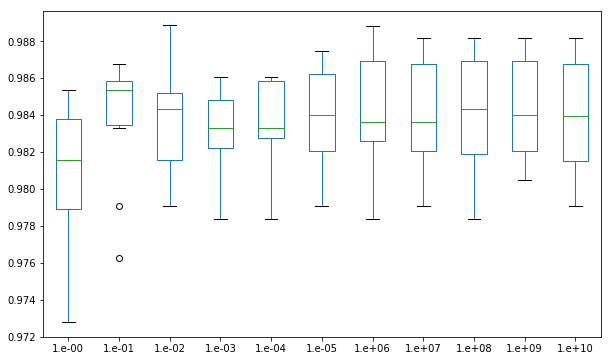

In [23]:
box_plot(l1_best) # L1 regularizer 

In [24]:
l2_best, l2_coef = logistic_bestpara_cv('l2') # L2 regularizer 

Max accuracy regularization Cs  = 10 ^ 2
or ie Cs =  100
Max accuracy train =  0.984255910025721
Test Accuracy : 0.9860230781732489


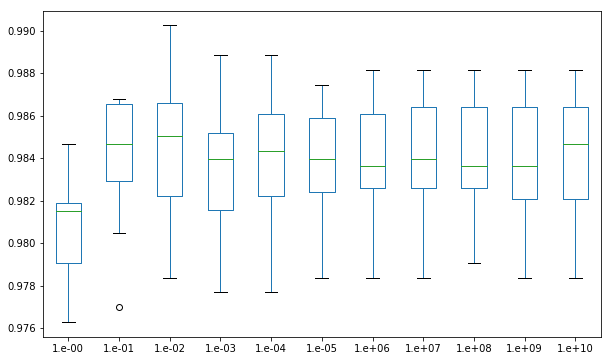

In [25]:
box_plot(l2_best) # L2 regularizer 

# IMAGE 

In [26]:
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  
    img = im.resize((28,28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    newImage.paste(img)  
    tv = list(newImage.getdata()) 
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

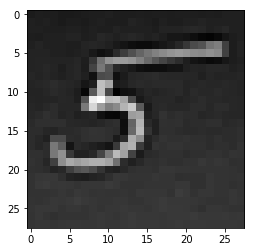

In [27]:
x = [imageprepare('/Users/shradhitsubudhi/Desktop/5.png')]#file path here

newArr = [[0 for d in range(28)] for y in range(28)]
k = 0

for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1

plt.imshow(newArr, interpolation='nearest')
plt.savefig('MNIST_IMAGE.png')
plt.show()

In [28]:
digit = np.array(newArr)
digit = digit.reshape(1,784)
digit.shape

(1, 784)

In [29]:
model.predict(digit)  #SVC

array(['5.0'], dtype=object)

In [30]:
clf.predict(digit) #Logistic Regression

array(['5.0'], dtype=object)